In [231]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style


import warnings 
warnings.filterwarnings('ignore')
import joblib


In [139]:
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
import lightgbm as lgb
import xgboost as xgb 

In [157]:
#importing dataset from given github link 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [158]:
#Checking the dimention of the dataset
df.shape

(891, 12)

In [159]:
#First

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Data Exploration / Analysis

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In the above frame we can see that there are 3 types of data int, float and objects.

In [162]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of dataset survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contains missing values like the Age Features. 

In [121]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


from the above, we can noe a few things first of alll that we need to convert a lot of features into numeric ones later on, so that the ML algorithms can process them. Furthermore, we can see that the features have sidely different ranges, that we will need to convert into roughly the same scale.  We can also spot some more features, that contains missing values (Nan = Not a number), that we need to deal with. 


Lets take a more detailed look at what data is actually missing:

In [126]:
Total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. it will be much more tricky, to deal with the 'Age' feature, which has 177 missing value. The 'Cabin' feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77% of it are missing.

In [128]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

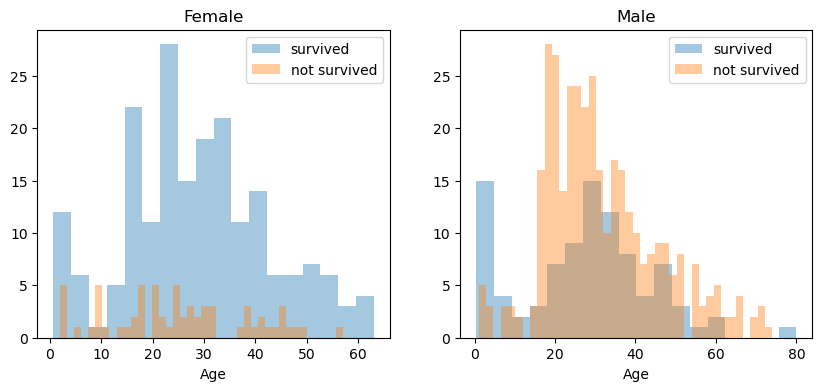

In [134]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women= df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label= survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label= not_survived, ax = axes[0], kde= False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
            

you can see that men have high probability of survival when they are between 18 to 30 years old, which is alos a little bit true for women but not fully. For women the survival chances are higher b/w 14 to 40 . 

For men the probability  of suvival is very low b/w 5 to 18 but that isnt true for womrn. Another thing to note is that infants also  have a little bit higher probability of survival. 

Since there seem to be Certain age, which have increased odds of survial and becasue i want every feature to be roughly on the same scale. i will create age gruop later on. 

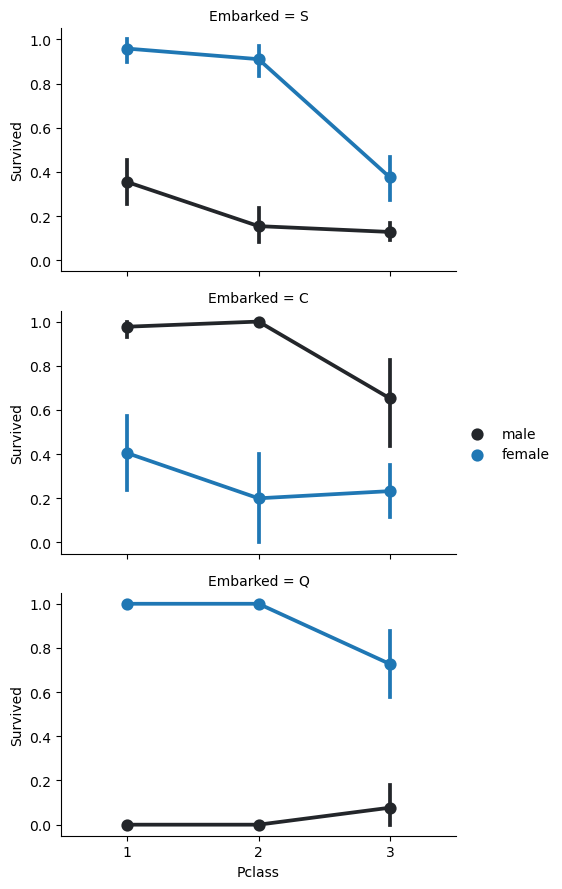

In [141]:
FacetGrid = sns.FacetGrid(df, row = 'Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender. 

Women on port Q and on port S have a higher chance of survial.  The Inverse is true, if they are at port C.  Men have a high survial probability if they are on port C, but a low probabilty if they are on port Q or S. 

Pclass also seems to be correleted with survival. We wil generate another plot of it below.

<Axes: xlabel='Pclass', ylabel='Survived'>

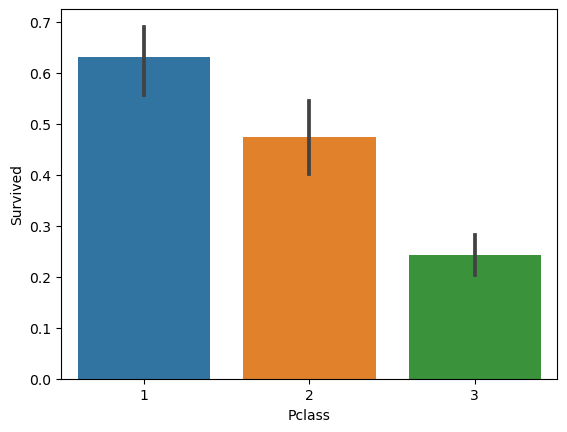

In [142]:
sns.barplot(x='Pclass', y='Survived', data=df)

here we see clearly, that pclass is contributing to a persons chances of survival especially if this person is in class 1. We will create another Pclass plot below. 

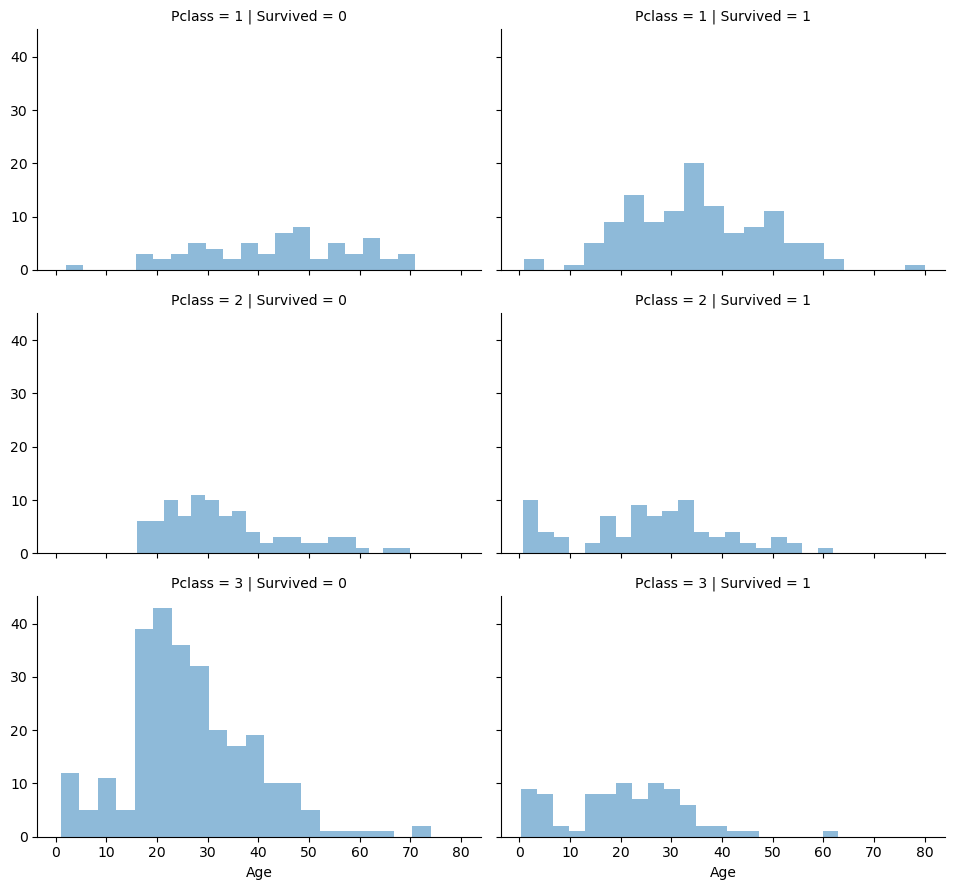

In [144]:
grid = sns.FacetGrid(df, col='Survived', row= 'Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

the plot above confirms our assemption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

In [175]:
#Lets Handle the missing values
#Dropping the cabin column from the data frame as it wont be of much important 
df=df.drop(columns='Cabin', axis=1)


In [176]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [177]:
print(df['Embarked'].mode())

0    0.0
Name: Embarked, dtype: float64


In [178]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#Lets check the null value again 
df.isnull().sum()

#As you can see no such empty cells are present 

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [180]:
#lets convert the string type values into integer values and transform it into a categorical column

df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [181]:
#lets check the values are changed or not

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


# Building the Machine learning Models

In [188]:
X_train = df.drop(['Survived', 'Ticket', 'Name', 'PassengerId'],  axis=1)
Y_train = df["Survived"]
X_test = df.drop(["PassengerId", 'Survived', 'Ticket', 'Name'], axis=1).copy()

In [184]:
from sklearn import linear_model

In [189]:
#SGD Learning 

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)

print(round(acc_sgd,2,), "%")

73.06 %


In [190]:
#Random forest

random_forest= RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train,Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100,2)
print(round(acc_random_forest,2,), "%")

98.2 %


In [192]:
# Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train)*100, 2)
print(round(acc_log,2,), '%')

80.47 %


In [196]:
#Knn 

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
print(round(acc_knn,2,), '%')

82.94 %


In [198]:
#perceptron

perceptron =Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
print(round(acc_perceptron,2,), '%')

42.87 %


In [199]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100,2)
print(round(acc_linear_svc,2,), '%')

79.46 %


In [201]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)
print(round(acc_decision_tree,2,), '%')

98.2 %


In [208]:
results = pd.DataFrame({
    'Model':['Random Forest','Decision Tree','KNN', 'Logistic Regression', 'Support Vector Machine', 'Stochastic Gradient Decent', 'Perceptron'],
    'Score': [acc_random_forest, acc_decision_tree, acc_knn, acc_log, acc_linear_svc, acc_sgd, acc_perceptron]})

result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.20,Random Forest
98.20,Decision Tree
82.94,KNN
80.47,Logistic Regression
79.46,Support Vector Machine
73.06,Stochastic Gradient Decent
42.87,Perceptron


As we see Random Forest goes on first place. But first, let us check, how random forest performs, when we use cross validation

In [209]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train,Y_train, cv=10, scoring = 'accuracy')

In [210]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:",scores.std())

Scores: [0.75555556 0.82022472 0.75280899 0.83146067 0.8988764  0.80898876
 0.82022472 0.75280899 0.85393258 0.84269663]
Mean: 0.8137578027465668
Standard Deviation: 0.04575307633552741


This looks much more realistic than before.our model has a average accuracy of 81% with a standard deviation of 4%. The standard deviation shows us, how precise the estimates are.

This means in our case that the accuracy of our model can differ +- 4%
 

In [211]:
# Training Random Forest again 

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100,2)
print(round(acc_random_forest,2,), "%")

98.2 %


Our random forest model predicts as good as it did before.

In [212]:
print("oob score :", round(random_forest.oob_score_, 4)*100, "%")

oob score : 81.14 %



# Confusion Matrix

In [214]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[460,  89],
       [ 95, 247]], dtype=int64)

The first row is about the not survived predictions : 460 passengers where correctly classified as not survived and 89 were wrongly classified as not survived
    
The second row is about the survived prediction 95 passenger where wro ngly classified as survived and 247 where correctly classified as survived


# Precision and Recall

In [215]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:", recall_score(Y_train, predictions))

Precision: 0.7351190476190477
Recall: 0.7222222222222222


our model predict 75% of the time a passeneger survived correctly. The recall tells us that it predicted the survival of 72% of the people who actually survived.

In [216]:
#Lets combine Precision and recall

from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.728613569321534

# Precision Recall Curve

In [224]:
from sklearn.metrics import precision_recall_curve

Y_score = random_forest.predict_proba(X_train)
Y_score = Y_score[:,1]
precision, recall, threshold = precision_recall_curve(Y_train, Y_score)

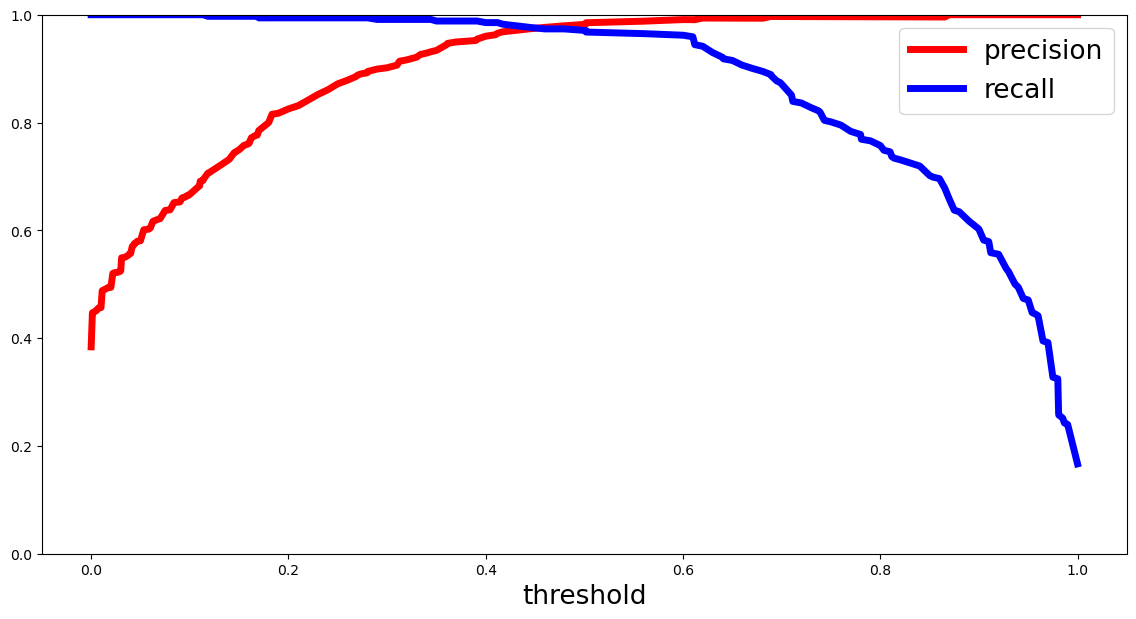

In [226]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold",fontsize=19)
    plt.legend(loc="upper right",fontsize=19)
    plt.ylim([0,1])
    
plt.figure(figsize=(14,7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

# ROC AUC Curve

In [228]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, Y_score)

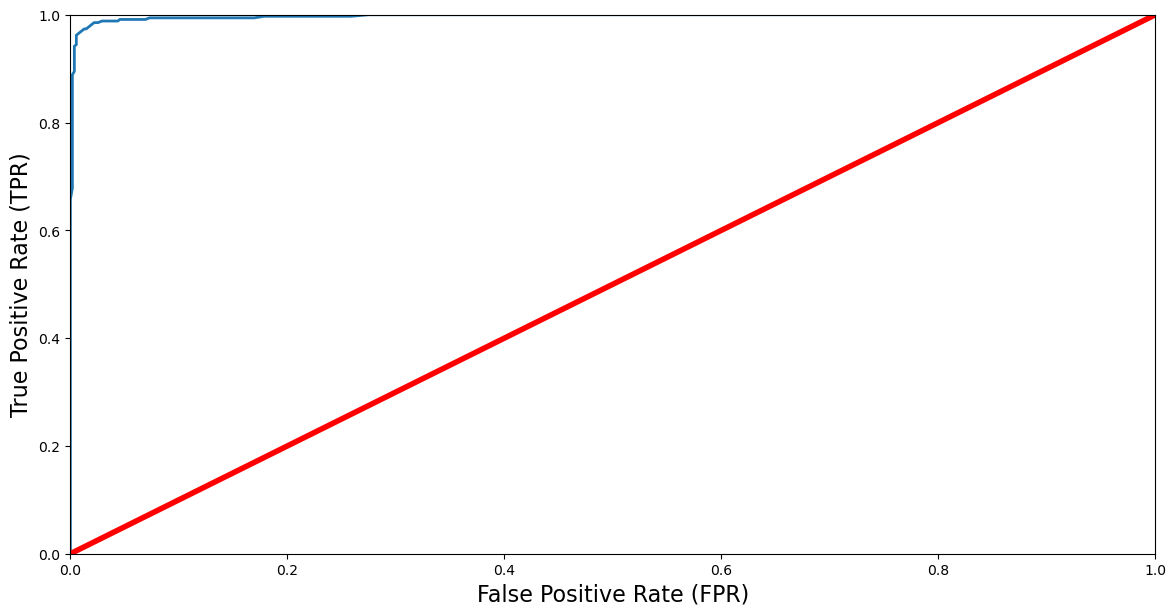

In [229]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'r', linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    
plt.figure(figsize=(14,7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# ROC AUC Score 

A Classifier that is 100% correct, would have a ROC AUC score of 1 and a completely random classifier would have a score of 0.5

In [230]:
from sklearn.metrics import roc_auc_score

r_a_score = roc_auc_score(Y_train, Y_score)
print("ROC_AUC_SCORE:", r_a_score)

ROC_AUC_SCORE: 0.9972757485699677
